## IMPORTACION DE CSV TRAIN Y TEST

In [84]:
test=pd.read_csv(r'C:\Users\fotot\OneDrive\Escritorio\PI2\Datathon\properties_colombia_test.csv')
data=pd.read_csv(r'C:\Users\fotot\OneDrive\Escritorio\PI2\Datathon\properties_colombia_train.csv')

## Importacion de librerias que se usaran

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import tree
from pandas.plotting import scatter_matrix

In [97]:
data.isnull().sum()

Unnamed: 0              0
id                      0
ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 49498
lon                 49498
l1                      0
l2                      0
l3                  11032
l4                 152182
l5                 170140
l6                 190682
rooms              170012
bedrooms           157024
bathrooms           41082
surface_total      190575
surface_covered    187747
price                  63
currency               67
price_period       161578
title                   1
description           121
property_type           0
operation_type          0
geometry                0
dtype: int64

In [98]:
#saco promedio de precio para clasificar en base a este numero
promedio=data['price'].mean()

In [99]:
#creo la columna target y clasifico segun promedio en caro y barato
data['target']=np.where(data['price']>=promedio,1,0)

In [147]:
#cuantas categoriast tiene la columna l1, no tiene valor para la prediccion porque es una unica categoria
data['l1'].value_counts()

Colombia    197549
Name: l1, dtype: int64

In [149]:
#cuantas categorias tiene la columna ad_type, no tiene valor para la prediccion porque es una unica categoria
data['ad_type'].value_counts()

Propiedad    197549
Name: ad_type, dtype: int64

In [105]:
#verificamos cuantas categorias tiene---> tiene 8 categorias
data['property_type'].value_counts()

Apartamento        100527
Casa                60500
Otro                16530
Lote                16507
Local comercial      1255
Finca                1135
Oficina              1085
Parqueadero            10
Name: property_type, dtype: int64

In [106]:
#pasamos a numerica la columna 'property_type' y creamos una nueva columna que se llamara tipo
codificador=OrdinalEncoder()
data['tipo']=codificador.fit_transform(data[['property_type']])

In [108]:
#verificamos cuantas categorias tiene---> solo tiene ventas, por lo que no la incuiremos en el modelo
data['operation_type'].value_counts()

Venta    197549
Name: operation_type, dtype: int64

In [109]:
#verificamos cuantas categorias tiene
data['geometry'].value_counts()

POINT EMPTY                         49498
POINT (-73.112 7.119)                 264
POINT (-75.572 6.203)                 259
POINT (-76.554 3.258)                 208
POINT (-74.1376942 4.6303361)         143
                                    ...  
POINT (-75.662 4.542)                   1
POINT (-74.77732886 10.98746865)        1
POINT (-74.078 4.645)                   1
POINT (-74.029133 4.707117)             1
POINT (-73.106 7.064)                   1
Name: geometry, Length: 62807, dtype: int64

In [110]:
#pasamos a numerica la columna 'geometry' y creamos una nueva columna que se llamara ubicacion
codificador=OrdinalEncoder()
data['ubicacion']=codificador.fit_transform(data[['geometry']])

In [159]:
#calculo promedio de rooms para reemplazar datos nulos
prom_room=round(data['rooms'].mean(),0)
#reemplazo nulos en room por promedio de rooms
data['rooms']=data['rooms'].fillna(prom_room)

In [161]:
#calculo promedio de bedrooms para reemplazar datos nulos
prom_bedroom=round(data['bedrooms'].mean(),0)
#reemplazo nulos en room por promedio de rooms
data['bedrooms']=data['bedrooms'].fillna(prom_bedroom)

In [163]:
#saco promedio de superficie total
sup=data['surface_total'].mean()
#reemplazo nulos de superficie total con promedio
data['superficie_total']=data['surface_total'].fillna(sup)

In [137]:
#reemplazo nulos en bathroom por 1, ya que al menos un baño hay en cada casa
data['bathrooms']=data['bathrooms'].fillna(1)

In [138]:
#paso a numeros la columna 'l2' y creo la columna ciudades 
codificador=OrdinalEncoder()
data['ciudades']=codificador.fit_transform(data[['l2']])

In [139]:
data.isnull().sum()

Unnamed: 0               0
id                       0
ad_type                  0
start_date               0
end_date                 0
created_on               0
lat                  49498
lon                  49498
l1                       0
l2                       0
l3                   11032
l4                  152182
l5                  170140
l6                  190682
rooms                    0
bedrooms                 0
bathrooms                0
surface_total       190575
surface_covered     187747
price                   63
currency                67
price_period        161578
title                    1
description            121
property_type            0
operation_type           0
geometry                 0
target                   0
superficie_total         0
ciudades                 0
tipo                     0
ubicacion                0
dtype: int64

# Graficamos

In [156]:
#incluiremos en el grafico las features numericas
atributos=pd.DataFrame(data[['rooms','bedrooms','bathrooms','superficie_total','ciudades','tipo','ubicacion','target']])

array([[<AxesSubplot: xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot: xlabel='bedrooms', ylabel='rooms'>,
        <AxesSubplot: xlabel='bathrooms', ylabel='rooms'>,
        <AxesSubplot: xlabel='superficie_total', ylabel='rooms'>,
        <AxesSubplot: xlabel='target', ylabel='rooms'>,
        <AxesSubplot: xlabel='ciudades', ylabel='rooms'>,
        <AxesSubplot: xlabel='tipo', ylabel='rooms'>,
        <AxesSubplot: xlabel='ubicacion', ylabel='rooms'>],
       [<AxesSubplot: xlabel='rooms', ylabel='bedrooms'>,
        <AxesSubplot: xlabel='bedrooms', ylabel='bedrooms'>,
        <AxesSubplot: xlabel='bathrooms', ylabel='bedrooms'>,
        <AxesSubplot: xlabel='superficie_total', ylabel='bedrooms'>,
        <AxesSubplot: xlabel='target', ylabel='bedrooms'>,
        <AxesSubplot: xlabel='ciudades', ylabel='bedrooms'>,
        <AxesSubplot: xlabel='tipo', ylabel='bedrooms'>,
        <AxesSubplot: xlabel='ubicacion', ylabel='bedrooms'>],
       [<AxesSubplot: xlabel='rooms', ylabel

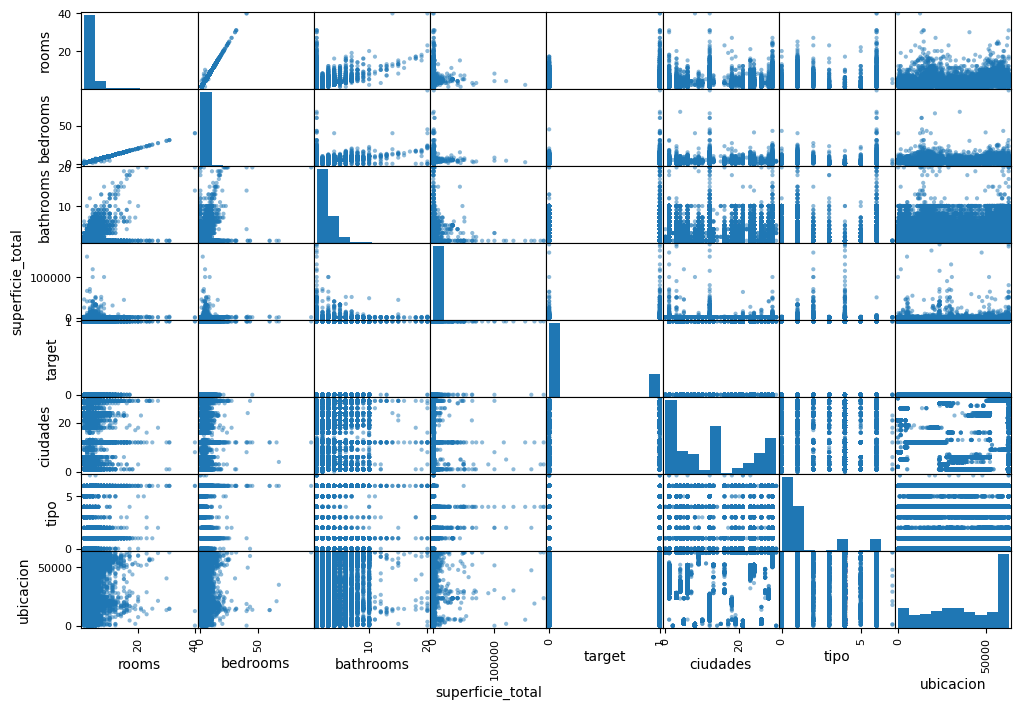

In [116]:
#incluiremos en el grafico las features numericas
scatter_matrix(data[atributos],figsize=(12,8))

* Correlación

<AxesSubplot: >

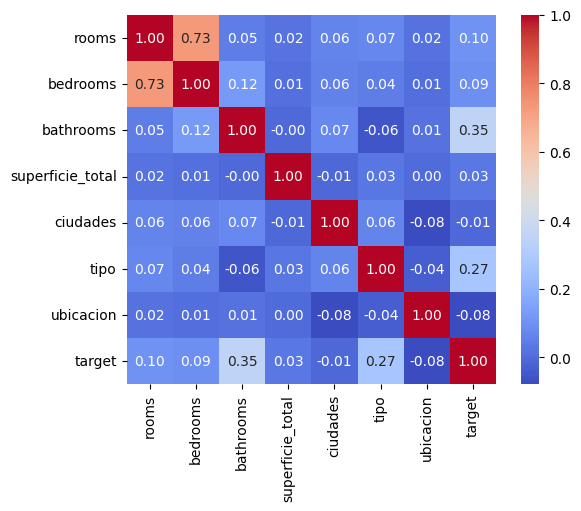

In [157]:
corr =atributos.corr()
#corr = data.drop(columns=['Sales']).corr()--> si quieroo sacar la columna objeto
sns.heatmap( corr, cbar = True,annot=True, square = True,  fmt= '.2f',annot_kws={'size': 10},
           xticklabels=corr.columns,
           yticklabels=corr.columns,
           cmap= 'coolwarm')

## APLICAMOS LOS MISMOS CAMBIOS A TEST

In [168]:
#pasamos a numerica la columna 'property_type' y creamos una nueva columna que se llamara tipo
codificador=OrdinalEncoder()
test['tipo']=codificador.fit_transform(test[['property_type']])

In [165]:
#paso a numeros la columna 'l2' y creo la columna ciudades 
codificador=OrdinalEncoder()
test['ciudades']=codificador.fit_transform(test[['l2']])

In [158]:
#pasamos a numerica la columna 'geometry' y creamos una nueva columna que se llamara ubicacion
codificador=OrdinalEncoder()
test['ubicacion']=codificador.fit_transform(test[['geometry']])

In [160]:
#calculo promedio de rooms para reemplazar datos nulos
prom_room=round(test['rooms'].mean(),0)
#reemplazo nulos en room por promedio de rooms
test['rooms']=test['rooms'].fillna(prom_room)

In [162]:
#calculo promedio de bedrooms para reemplazar datos nulos
prom_bedroom=round(test['bedrooms'].mean(),0)
#reemplazo nulos en room por promedio de rooms
test['bedrooms']=test['bedrooms'].fillna(prom_bedroom)

In [164]:
#saco promedio de superficie total
sup=test['surface_total'].mean()
#reemplazo nulos de superficie total con promedio
test['superficie_total']=test['surface_total'].fillna(sup)

In [166]:
#reemplazo nulos en bathroom por 1, ya que al menos un baño hay en cada casa
test['bathrooms']=test['bathrooms'].fillna(1)

In [169]:
#incluiremos en el grafico las features numericas
atributos_test=pd.DataFrame(test[['rooms','bedrooms','bathrooms','superficie_total','ciudades','tipo','ubicacion']])

## Creación del modelo: Decision Tree

In [141]:
#separo mis datos en prueba y test para poder hacer un modelo mas acertado, uso features numericas
x_train,x_test,y_trai,y_test=train_test_split(data[['rooms','bedrooms','bathrooms','superficie_total','ciudades','tipo','ubicacion']],data['target'],test_size=0.3)

In [142]:
arbol_decision=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
arbol=arbol_decision.fit(x_train.values,y_trai.values)

In [143]:
y_train_pred=arbol_decision.predict(x_test.values)

In [144]:
accuracy=arbol_decision.score(x_test.values,y_test.values)
accuracy

0.8260356028009787

In [145]:
from sklearn.metrics import recall_score
recall_score(y_test,y_train_pred)

0.447753659767794

# Pruebo mi modelo con los datos de Test

In [171]:
pred=arbol_decision.predict(atributos_test)
pred

c:\Users\fotot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 0, ..., 0, 0, 0])

In [174]:
MarluVigil=pd.DataFrame(pred)

In [ ]:
MarluVigil.to_csv(r'C:\Users\fotot\OneDrive\Escritorio\PI2',index=False)